# Get Stimuli

### import modules

In [1]:
import re
import glob
import json
import pickle

import numpy as np
import pandas as pd
import cv2

from PIL import Image, ImageDraw
from matplotlib import image

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")

from tqdm.notebook import tqdm

### get data

In [2]:
raw_df = pd.read_csv(
    "../data/raw/raw_data_publish.tsv",
    sep="\t",
    low_memory=False,
    index_col=[0],
    header=[0],
)
raw_df.tail()

Progress Duration (in seconds) Finished AF01AFS MU_1_x AF01AFS MU_1_y  \
229        2                  1231    False            NaN            NaN   
230      100                  1316     True            214            379   
231      100                  4759     True            237            347   
232      100                  2709     True            238            338   
233      100                  8872     True            202            384   

    AF01AFS MU_2_x AF01AFS MU_2_y AF01AFS MU_3_x AF01AFS MU_3_y  \
229            NaN            NaN            NaN            NaN   
230            350            385            NaN            NaN   
231            314            338            292            291   
232            316            341            280            307   
233            350            391            277            339   

    AF01AFS MU_4_x  ... FL_8_DO_AM04SUS FL_8_DO_AF30NES FL_8_DO_AM23AFS  \
229            NaN  ...             NaN             NaN             NaN   
230            NaN  ...              59              64               7   
231            381  ...              29              57              15   
232            341  ...              65              67               7   
233            230  ...               4              13              12   

    FL_8_DO_AM23NES FL_8_DO_AM32SAS FL_8_DO_AM06DIS FL_8_DO_AF14DIS  \
229             NaN             NaN             NaN             NaN   
230              12              53              10              38   
231              70               4               2              60   
232              63              43              26              45   
233              20              56              15              18   

    FL_8_DO_AF30SUS FL_8_DO_AM02SUS FL_8_DO_AM04SAS  
229             NaN             NaN             NaN  
230              28              24              14  
231              14              18              62  
232              14               9              35  
233              41               3              47  

[5 rows x 4628 columns]

### get image infos from logfile

Get the names from the columns of the data table

In [3]:
face_names = set([c.split("_")[0] for c in raw_df.columns if ( c.startswith("AF") or c.startswith("AM") ) and c.endswith("Auswahl")])
face_names = sorted(face_names)

In [4]:
face_names[::3]

['AF01AFS Auswahl',
 'AF01ANS Auswahl',
 'AF01DIS Auswahl',
 'AF01HAS Auswahl',
 'AF01NES Auswahl',
 'AF01SAS Auswahl',
 'AF01SUS Auswahl',
 'AF05AFS Auswahl',
 'AF05ANS Auswahl',
 'AF05DIS Auswahl',
 'AF05HAS Auswahl',
 'AF05NES Auswahl',
 'AF05SAS Auswahl',
 'AF05SUS Auswahl',
 'AF07AFS Auswahl',
 'AF07ANS Auswahl',
 'AF07DIS Auswahl',
 'AF07HAS Auswahl',
 'AF07NES Auswahl',
 'AF07SAS Auswahl',
 'AF07SUS Auswahl',
 'AF14AFS Auswahl',
 'AF14ANS Auswahl',
 'AF14DIS Auswahl',
 'AF14HAS Auswahl',
 'AF14NES Auswahl',
 'AF14SAS Auswahl',
 'AF14SUS Auswahl',
 'AF30AFS Auswahl',
 'AF30ANS Auswahl',
 'AF30DIS Auswahl',
 'AF30HAS Auswahl',
 'AF30NES Auswahl',
 'AF30SAS Auswahl',
 'AF30SUS Auswahl',
 'AM02AFS Auswahl',
 'AM02ANS Auswahl',
 'AM02DIS Auswahl',
 'AM02HAS Auswahl',
 'AM02NES Auswahl',
 'AM02SAS Auswahl',
 'AM02SUS Auswahl',
 'AM04AFS Auswahl',
 'AM04ANS Auswahl',
 'AM04DIS Auswahl',
 'AM04HAS Auswahl',
 'AM04NES Auswahl',
 'AM04SAS Auswahl',
 'AM04SUS Auswahl',
 'AM06AFS Auswahl',


### get image infos from filenames

The KDEF images (original and masked) need to be in the ```stim``` folder. These data are not provided in this repository for copyright reasons. 

In [5]:
ims = glob.glob("../stim/*.jpg")
ims = sorted(ims)

In [6]:
[i[8:-4] for i in ims[::3]]

['AF01AFS-MO',
 'AF01ANS-MO',
 'AF01DIS-MO',
 'AF01HAS-MO',
 'AF01NES-MO',
 'AF01SAS-MO',
 'AF01SUS-MO',
 'AF05AFS-MO',
 'AF05ANS-MO',
 'AF05DIS-MO',
 'AF05HAS-MO',
 'AF05NES-MO',
 'AF05SAS-MO',
 'AF05SUS-MO',
 'AF07AFS-MO',
 'AF07ANS-MO',
 'AF07DIS-MO',
 'AF07HAS-MO',
 'AF07NES-MO',
 'AF07SAS-MO',
 'AF07SUS-MO',
 'AF14AFS-MO',
 'AF14ANS-MO',
 'AF14DIS-MO',
 'AF14HAS-MO',
 'AF14NES-MO',
 'AF14SAS-MO',
 'AF14SUS-MO',
 'AF30AFS-MO',
 'AF30ANS-MO',
 'AF30DIS-MO',
 'AF30HAS-MO',
 'AF30NES-MO',
 'AF30SAS-MO',
 'AF30SUS-MO',
 'AM02AFS-MO',
 'AM02ANS-MO',
 'AM02DIS-MO',
 'AM02HAS-MO',
 'AM02NES-MO',
 'AM02SAS-MO',
 'AM02SUS-MO',
 'AM04AFS-MO',
 'AM04ANS-MO',
 'AM04DIS-MO',
 'AM04HAS-MO',
 'AM04NES-MO',
 'AM04SAS-MO',
 'AM04SUS-MO',
 'AM06AFS-MO',
 'AM06ANS-MO',
 'AM06DIS-MO',
 'AM06HAS-MO',
 'AM06NES-MO',
 'AM06SAS-MO',
 'AM06SUS-MO',
 'AM23AFS-MO',
 'AM23ANS-MO',
 'AM23DIS-MO',
 'AM23HAS-MO',
 'AM23NES-MO',
 'AM23SAS-MO',
 'AM23SUS-MO',
 'AM32AFS-MO',
 'AM32ANS-MO',
 'AM32DIS-MO',
 'AM32HAS-

In [7]:
regex = re.compile(".*(A\w+\d+\w+)[-]?(\w+)?\.\w+")

In [8]:
idx = pd.MultiIndex.from_tuples([regex.findall(i)[-1] for i in ims])

In [9]:
stim_df = pd.DataFrame(ims, index=idx)
stim_df.columns = ["file_name"]

In [10]:
stim_df

file_name
AF01AFS MO  ../stim/AF01AFS-MO.jpg
        MU  ../stim/AF01AFS-MU.jpg
               ../stim/AF01AFS.jpg
AF01ANS MO  ../stim/AF01ANS-MO.jpg
        MU  ../stim/AF01ANS-MU.jpg
...                            ...
AM32SAS MU  ../stim/AM32SAS-MU.jpg
               ../stim/AM32SAS.jpg
AM32SUS MO  ../stim/AM32SUS-MO.jpg
        MU  ../stim/AM32SUS-MU.jpg
               ../stim/AM32SUS.jpg

[210 rows x 1 columns]

In [11]:
in_stim_dict = {}
for face_name in face_names:

    try:
        name, cond = face_name.split(" ")
    except:
        name, cond = face_name, ""

    in_stim = False
    for (stim_name, stim_cond) in stim_df.index:
        if (name, cond) == (stim_name, stim_cond):
            in_stim = True

    in_stim_dict[face_name] = in_stim

In [12]:
pd.DataFrame(in_stim_dict, index=["status"]).T.sort_values(by="status")

status
AF01AFS Auswahl      False
AM04DIS-MO Auswahl   False
AM04DIS-MU Auswahl   False
AM04HAS Auswahl      False
AM04HAS-MO Auswahl   False
...                    ...
AF14HAS-MU Auswahl   False
AF14NES Auswahl      False
AF14NES-MO Auswahl   False
AF07HAS-MO Auswahl   False
AM32SUS-MU Auswahl   False

[210 rows x 1 columns]

In [13]:
assert (stim_df.groupby(level=[0, 1]).first().shape == stim_df.shape), "warning, contains duplicates"

In [14]:
assert (    len(face_names) == stim_df.shape[0]), "warning, logfile-stim and file-stim numbers do not match"

#### dictionary for renaming

In [15]:
with open("../references/cond_dict.json", "r") as fp:
    cond_dict = json.load(fp)

In [16]:
stim_df = stim_df.rename(cond_dict)
stim_df.tail()

file_name
AM32SAS Upper  ../stim/AM32SAS-MU.jpg
        Full      ../stim/AM32SAS.jpg
AM32SUS Lower  ../stim/AM32SUS-MO.jpg
        Upper  ../stim/AM32SUS-MU.jpg
        Full      ../stim/AM32SUS.jpg

### add cut infos

The faces in the images are well-aligned (see average image later), but there are still slight differences. Here, we define by hand a horizontal line slightly above the tip of the nose of each face. Subsequently, this can be visually validated.

In [17]:
for i in stim_df.index:
    if i[1] == "Lower":

        im = stim_df.loc[i, "file_name"]

        a = plt.imread(im)
        b = a == [255, 255, 255]

        for p in range(b.shape[0]):
            this = b[p][300]
            if not this.all():
                for j in stim_df.index.levels[1]:
                    stim_df.loc[(i[0], j), "cut"] = p
                break

In [18]:
stim_df

file_name    cut
AF01AFS Lower  ../stim/AF01AFS-MO.jpg  432.0
        Upper  ../stim/AF01AFS-MU.jpg  432.0
        Full      ../stim/AF01AFS.jpg  432.0
AF01ANS Lower  ../stim/AF01ANS-MO.jpg  448.0
        Upper  ../stim/AF01ANS-MU.jpg  448.0
...                               ...    ...
AM32SAS Upper  ../stim/AM32SAS-MU.jpg  448.0
        Full      ../stim/AM32SAS.jpg  448.0
AM32SUS Lower  ../stim/AM32SUS-MO.jpg  432.0
        Upper  ../stim/AM32SUS-MU.jpg  432.0
        Full      ../stim/AM32SUS.jpg  432.0

[210 rows x 2 columns]

#### dictionary for renaming

In [19]:
cat_dict = {
    "AFS": "Fearful",
    "ANS": "Angry",
    "DIS": "Disgusted",
    "HAS": "Happy",
    "NES": "Neutral",
    "SAS": "Sad",
    "SUS": "Surprised",
}

with open("../references/cat_dict.json", "w") as fp:
    json.dump(cat_dict, fp)

with open("../references/cat_dict.json", "r") as fp:
    cat_dict = json.load(fp)

cat_dict

{'AFS': 'Fearful',
 'ANS': 'Angry',
 'DIS': 'Disgusted',
 'HAS': 'Happy',
 'NES': 'Neutral',
 'SAS': 'Sad',
 'SUS': 'Surprised'}

In [20]:
regex = re.compile(r"(\w+\d+)(\w+)")
idx = [
    (regex.findall(i)[-1][0], regex.findall(i)[-1][1], j) for (i, j) in stim_df.index
]
stim_df.index = pd.MultiIndex.from_tuples(idx)
stim_df = stim_df.rename(cat_dict)

In [21]:
stim_df

file_name    cut
AF01 Fearful   Lower  ../stim/AF01AFS-MO.jpg  432.0
               Upper  ../stim/AF01AFS-MU.jpg  432.0
               Full      ../stim/AF01AFS.jpg  432.0
     Angry     Lower  ../stim/AF01ANS-MO.jpg  448.0
               Upper  ../stim/AF01ANS-MU.jpg  448.0
...                                      ...    ...
AM32 Sad       Upper  ../stim/AM32SAS-MU.jpg  448.0
               Full      ../stim/AM32SAS.jpg  448.0
     Surprised Lower  ../stim/AM32SUS-MO.jpg  432.0
               Upper  ../stim/AM32SUS-MU.jpg  432.0
               Full      ../stim/AM32SUS.jpg  432.0

[210 rows x 2 columns]

#### reorder

In [22]:
stim_df = stim_df.reorder_levels([2, 1, 0]).sort_index()
stim_df

file_name    cut
Full  Angry     AF01     ../stim/AF01ANS.jpg  448.0
                AF05     ../stim/AF05ANS.jpg  448.0
                AF07     ../stim/AF07ANS.jpg  432.0
                AF14     ../stim/AF14ANS.jpg  448.0
                AF30     ../stim/AF30ANS.jpg  448.0
...                                      ...    ...
Upper Surprised AM02  ../stim/AM02SUS-MU.jpg  432.0
                AM04  ../stim/AM04SUS-MU.jpg  432.0
                AM06  ../stim/AM06SUS-MU.jpg  432.0
                AM23  ../stim/AM23SUS-MU.jpg  432.0
                AM32  ../stim/AM32SUS-MU.jpg  432.0

[210 rows x 2 columns]

store

In [23]:
stim_df.to_csv("../data/interim/stim_df.tsv", sep="\t", index=[0, 1, 2])

re-load

In [24]:
stim_df = pd.read_csv("../data/interim/stim_df.tsv", sep="\t", index_col=[0, 1, 2])
stim_df

file_name    cut
Full  Angry     AF01     ../stim/AF01ANS.jpg  448.0
                AF05     ../stim/AF05ANS.jpg  448.0
                AF07     ../stim/AF07ANS.jpg  432.0
                AF14     ../stim/AF14ANS.jpg  448.0
                AF30     ../stim/AF30ANS.jpg  448.0
...                                      ...    ...
Upper Surprised AM02  ../stim/AM02SUS-MU.jpg  432.0
                AM04  ../stim/AM04SUS-MU.jpg  432.0
                AM06  ../stim/AM06SUS-MU.jpg  432.0
                AM23  ../stim/AM23SUS-MU.jpg  432.0
                AM32  ../stim/AM32SUS-MU.jpg  432.0

[210 rows x 2 columns]

In [25]:
stim_df.groupby(level=[1, 2]).mean().loc[:, "cut"].std() / plt.imread(ims[0]).shape[0] * 100

1.066046433757902

## visualize

#### show an image

In [26]:
def load_im(file_name):
    
    img = cv2.imread(file_name,  cv2.IMREAD_GRAYSCALE)
    
    return img

In [27]:
file_name = stim_df.loc[("Full", "Surprised", "AF30"), "file_name"]
file_name

'../stim/AF30SUS.jpg'

In [ ]:
res = load_im(file_name)
plt.imshow(res, cmap="Greys_r")
plt.show()

In [29]:
file_name = stim_df.loc[("Upper", "Surprised", "AF30"), "file_name"]
file_name

'../stim/AF30SUS-MU.jpg'

In [ ]:
res = load_im(file_name)
plt.imshow(res, cmap='Greys_r')
plt.show()

#### show upper/lower cutoff

In [ ]:
for cond in stim_df.index.levels[0]:

    for emo in stim_df.index.levels[1]:

        fig = plt.figure(figsize=(16, 3))

        this_emo = stim_df.loc[(cond, emo), :]

        for n, i in enumerate(this_emo.index):
            ax = plt.subplot(1, this_emo.shape[0], n + 1)

            this_im = this_emo.loc[i, "file_name"]
            this_cut = this_emo.loc[i, "cut"]

            res = load_im(this_im)
            ax.imshow(res, cmap="Greys_r")
            ax.set_title(i)
            ax.set_yticks([])
            ax.set_xticks([])
        plt.suptitle(emo)
        plt.tight_layout()
        plt.show()

## Make average color images

Use full condition

In [32]:
full_df = stim_df.loc['Full']

get dimensions of one example image as template

In [33]:
example_im = Image.open( full_df.iloc[0,0])
dims = (example_im.width, example_im.height)

### average for every condition separately

In [34]:
my_crop = (100, 150, 470, 650)

In [35]:
d = {}

# for each emotion
for n, i in enumerate(full_df.index.levels[0]):
    
    # make blank image first
    mean_im = Image.new('RGB', dims)
    
    # get all images
    ims = full_df.loc[i, 'file_name'].values

    # add each image to blend
    for m, im in enumerate(ims):
        # get the image
        im = Image.open(im)
        
        # every time a new image is added, it is weighted less (first one is 1, last one is 1/10 (out of 10))
        this_alpha = 1/(m+1)
        mean_im = Image.blend(mean_im, im, alpha=this_alpha)
        
        # store in dict
        d[i] = mean_im.crop(my_crop)

#### visualize averaged images

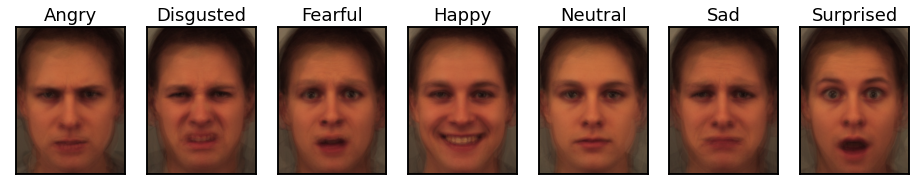

In [36]:
fig = plt.figure(figsize=(16, 6))
for n, i in enumerate(d):
    
    ax = plt.subplot(1, len(d.keys()), n+1)
    
    ax.imshow(d[i])
    ax.set_title(i)
    ax.set_xticks([]); ax.set_yticks([])
    
plt.show()

#### store for later re-use

In [37]:
with open('../models/average_im_dict.pkl', 'wb') as fp:
    pickle.dump(d, fp)